In [259]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
from matplotlib import colors
from matplotlib.colors import ListedColormap
from argparse import Namespace
from pymoo.indicators.hv import HV
from pymoo.config import Config
Config.warnings['not_compiled'] = False



In [260]:
conf = !python  parameters.py

In [261]:
configs = eval(conf[0])
configs.et_normalize_coef_cost

100

In [262]:
## ESPECIFIC CONFIGS
configs.name="E999_9"
configs.n_devices=999
configs.n_jobs=9

In [263]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)

In [264]:

df.columns = ["model","sample","time","cost","reward","iTime","iCost"]
df.head()

,model,sample,time,cost,reward,iTime,iCost
0,1000,0,740.00,1645.0,-740.00,495.00,1620.0
1,1000,1,666.75,1635.0,-666.75,396.75,1620.0
2,1000,2,756.25,1610.0,-756.25,471.25,1620.0
3,1000,3,718.25,1630.0,-718.25,363.25,1620.0
4,1000,4,967.50,1565.0,-967.50,497.50,1620.0


# DRL - average all samples (NOT VALID)

In [267]:
dfmodel = df.groupby("model").agg({"time":mean,"cost":mean})
dfmodel

,time,cost
model,,
0100,2531.245117,663.299988
1000,753.244995,1618.800049
2575,815.044983,575.099976
5050,733.344971,572.599976
7525,763.344971,1377.099976


In [268]:
print(type(dfmodel))


<class 'pandas.core.frame.DataFrame'>


In [269]:
for i in range(len(dfmodel)):
    print(dfmodel.iloc[i].name)
    print(dfmodel.iloc[i].time)
    

0100
2531.245
1000
753.245
2575
815.045
5050
733.345
7525
763.345


In [270]:
def getWeithDecomposition(val):
    if len(val)==3:
        if val[0]==0:
            return "(0,1)"
        else:
            return "(1,0)"
    else:
        return "(%s,%s)"%(val[0],val[1])
    

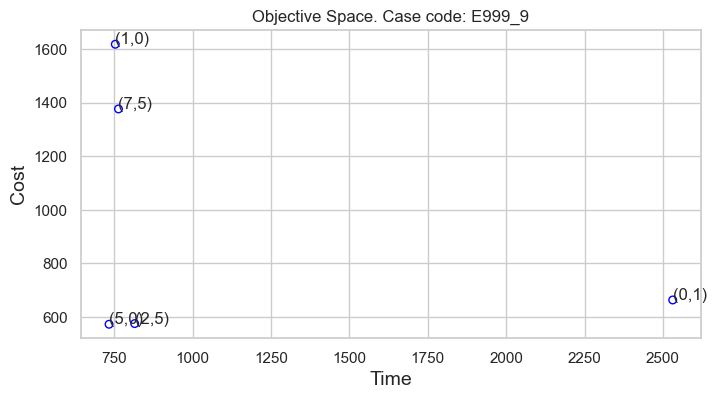

In [271]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(dfmodel.time, dfmodel.cost, s=30, facecolors='none', edgecolors='blue')


for i in range(len(dfmodel)):
    ax.annotate(getWeithDecomposition(dfmodel.iloc[i].name), (dfmodel.iloc[i].time, dfmodel.iloc[i].cost))

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [272]:
avg_pf = np.vstack((dfmodel.time.values,dfmodel.cost.values)).T
avg_pf.shape

(5, 2)

In [273]:
avg_pf

array([[2531.245,  663.3  ],
       [ 753.245, 1618.8  ],
       [ 815.045,  575.1  ],
       [ 733.345,  572.6  ],
       [ 763.345, 1377.1  ]], dtype=float32)

In [274]:
ref_point = np.array([500., 900.])
ind = HV(ref_point=ref_point)
print("HV", ind(avg_pf)) 

HV 0.0


# DRL one sample

In [275]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)
df.columns = ["model","case","time","cost","reward","iTime","iCost"]
df.head()


,model,case,time,cost,reward,iTime,iCost
0,1000,0,740.00,1645.0,-740.00,495.00,1620.0
1,1000,1,666.75,1635.0,-666.75,396.75,1620.0
2,1000,2,756.25,1610.0,-756.25,471.25,1620.0
3,1000,3,718.25,1630.0,-718.25,363.25,1620.0
4,1000,4,967.50,1565.0,-967.50,497.50,1620.0


In [276]:
dfDRL = df[df.case==0]
dfDRL

,model,case,time,cost,reward,iTime,iCost
0,1000,0,740.0,1645.0,-740.000000,495.0,1620.0
50,7525,0,745.0,1325.0,-939.166667,495.0,1620.0
100,5050,0,735.0,605.0,-1008.333333,495.0,1620.0
150,2575,0,855.0,675.0,-1192.500000,495.0,1620.0
200,0100,0,2505.0,725.0,-1321.666667,495.0,1620.0


In [277]:
avg_pf = np.vstack((dfDRL.time.values,dfDRL.cost.values)).T
avg_pf

array([[ 740., 1645.],
       [ 745., 1325.],
       [ 735.,  605.],
       [ 855.,  675.],
       [2505.,  725.]], dtype=float32)

In [278]:
def getWeithDecomposition(val):
    print(val)
    if val[0]=="0":
        return "(0,1.)"
    elif val[0]=="1":
        return "(1.,0)"
    return "(%s,%s)"%(float(val[0:2])/100,float(val[2:])/100)

(740.0, 1645.0)
1000
(745.0, 1325.0)
7525
(735.0, 605.0)
5050
(855.0, 675.0)
2575
(2505.0, 725.0)
0100


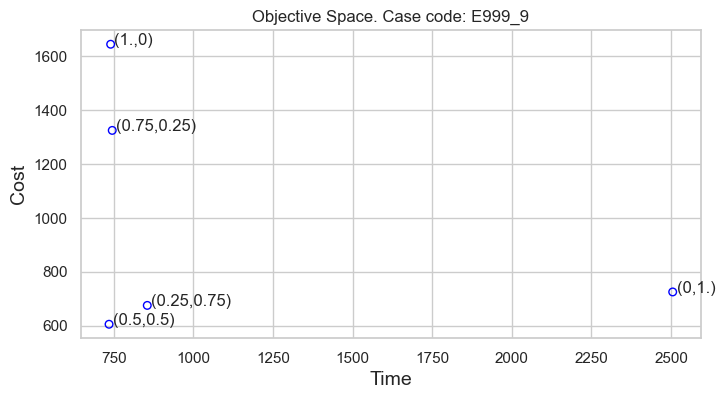

In [279]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(avg_pf[:,0], avg_pf[:,1], s=30, facecolors='none', edgecolors='blue')


for i in range(len(avg_pf)):
    print((avg_pf[i,0], avg_pf[i,1]))
    ax.annotate(getWeithDecomposition(dfDRL.iloc[i].model), (avg_pf[i,0]+12, avg_pf[i,1]-2.5))

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

# GA

In [280]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')

df = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0.pkl', 'infer')
# df = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)



In [281]:
df.columns = ["case","time","cost","executionTime"]
df.head()

,case,time,cost,executionTime
0,0,1145.0,720.0,2023.254134
1,0,930.0,875.0,2023.254134
2,0,960.0,845.0,2023.254134
3,0,1045.0,755.0,2023.254134
4,0,1165.0,705.0,2023.254134


In [282]:
dfga = df[df.case==0]
dfga

,case,time,cost,executionTime
0,0,1145.0,720.0,2023.254134
1,0,930.0,875.0,2023.254134
2,0,960.0,845.0,2023.254134
3,0,1045.0,755.0,2023.254134
4,0,1165.0,705.0,2023.254134
5,0,915.0,900.0,2023.254134
6,0,1005.0,790.0,2023.254134
7,0,1000.0,800.0,2023.254134
8,0,1110.0,730.0,2023.254134
9,0,1115.0,725.0,2023.254134


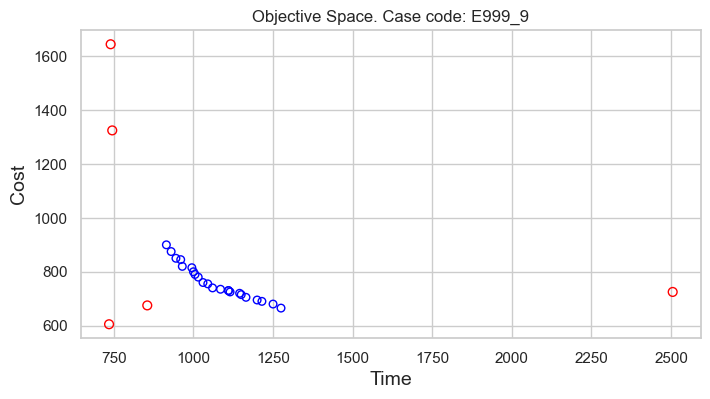

In [304]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(dfga.time, dfga.cost, s=30, facecolors='none', edgecolors='blue')
ax.scatter(avg_pf[:,0], avg_pf[:,1], s=40, facecolors='none', edgecolors='red',label="DRL")
plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

# GA + DRL

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


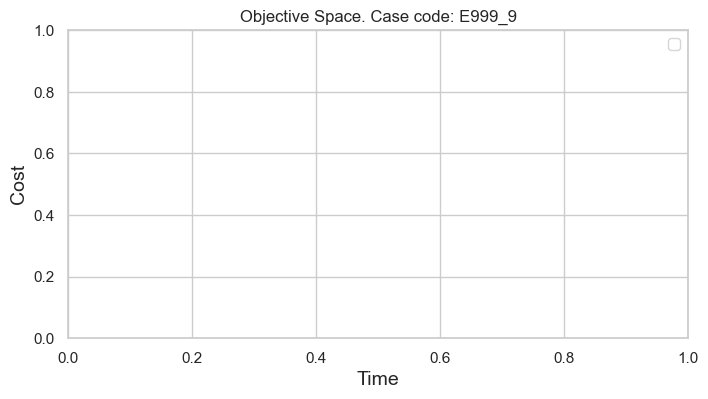

In [302]:
fig, ax = plt.subplots(figsize=(8,4))
# ax.scatter(dfga.time, dfga.cost, s=30, facecolors='none', edgecolors='blue',label="NSGA")

# ax.scatter(avg_pf[:,0], avg_pf[:,1], s=40, facecolors='none', edgecolors='red',label="DRL")

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.legend()
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [285]:
ga_pf = np.vstack((dfga.time.values,dfga.cost.values)).T

In [286]:
ref_point = np.array([900., 900.])
ind = HV(ref_point=ref_point)
print("H - GA ", ind(ga_pf)) 

H - GA  0.0


In [287]:
print("H - DRL ", ind(avg_pf)) 

H - DRL  48675.0


### Violin plot del PF según pesos del modelo DRL

In [288]:
dtvio = dfDRL.loc[:,["model","time","cost"]]
dtvio["case"]=np.zeros(len(dtvio),dtype=int)
dtvio

,model,time,cost,case
0,1000,740.0,1645.0,0
50,7525,745.0,1325.0,0
100,5050,735.0,605.0,0
150,2575,855.0,675.0,0
200,0100,2505.0,725.0,0


In [289]:
x = list(range(len(dtvio)))

In [290]:
def getWeithDecomposition(val):
    if len(val)==3:
        if val[0]=="0":
            return "(0,1.)"
        else:
            return "(1.,0)"
    else:
        return "(.%s,.%s)"%(val[0],val[1])
    
fticks = np.vectorize(getWeithDecomposition)
ticks = fticks(dtvio.model)
ticks

array(['(.1,.0)', '(.7,.5)', '(.5,.0)', '(.2,.5)', '(.0,.1)'], dtype='<U7')

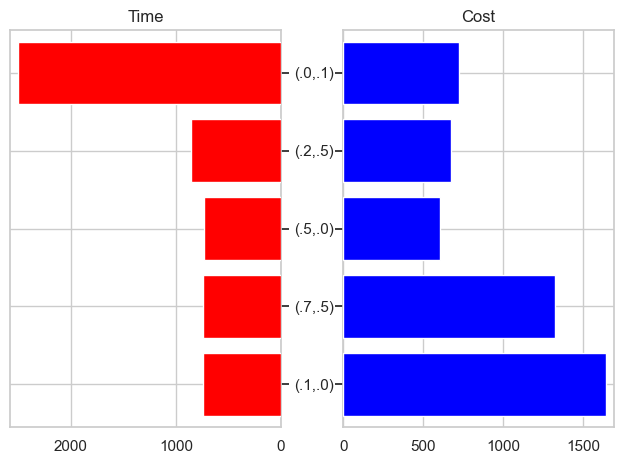

In [291]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, dtvio.time, align='center', color='red', zorder=10)
axes[0].set(title='Time')
axes[1].barh(x, dtvio.cost, align='center', color='blue', zorder=10)
axes[1].set(title='Cost')

axes[0].invert_xaxis()
axes[0].set(yticks=x, yticklabels=ticks)
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()



for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)
plt.show()

In [292]:
dtvio.model

0      1000
50     7525
100    5050
150    2575
200    0100
Name: model, dtype: object

In [293]:
dfmodel #average DRL all cases
print(dfmodel.index)

Index(['0100', '1000', '2575', '5050', '7525'], dtype='object', name='model')


In [294]:
dfrindex = dfmodel.reindex(['010', '19', '28', '37', '46', '55', '64', '73', '82', '91', '100'])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (11,) and arg 3 with shape (5,).

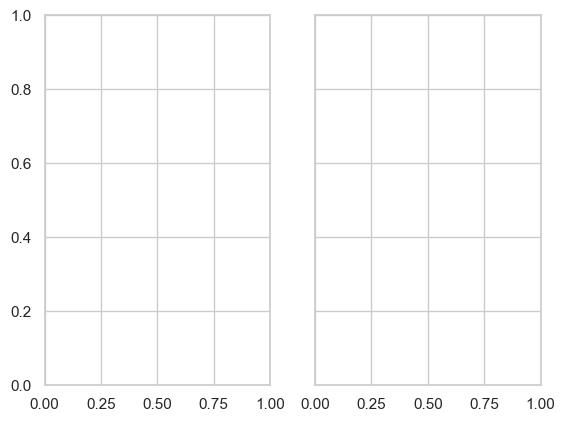

In [295]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, dfrindex.time, align='center', color='red', zorder=10)
axes[0].set(title='Time')
axes[1].barh(x, dfrindex.cost, align='center', color='blue', zorder=10)
axes[1].set(title='Cost')

axes[0].invert_xaxis()
axes[0].set(yticks=x, yticklabels=ticks)
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()



for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)
plt.show()

# MONO GA

In [331]:
df = pd.read_pickle('logs/log_ga_pf_mono_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0.pkl', 'infer')
df = pd.DataFrame(df)
df.columns = ["case","reward","time","cost","constraing","exec"]
df["reward2"] = df.time*0.5+(df.cost*(0.5/3))
df

,case,reward,time,cost,constraing,exec,reward2
0,0,[495.8333333333333],720.0,815.0,0,0 days 00:43:03,495.833344
1,0,[495.8333333333333],720.0,815.0,0,0 days 00:43:03,495.833344


In [332]:
dfDRL = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
dfDRL = pd.DataFrame(dfDRL)
dfDRL.columns = ["model","case","time","cost","reward","iTime","iCost"]
dt = dfDRL[dfDRL.model=="5050"]
dt["reward2"] = dt.time*0.5+(dt.cost*(0.5/3))
dt

/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_52707/3133565852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["reward2"] = dt.time*0.5+(dt.cost*(0.5/3))


,model,case,time,cost,reward,iTime,iCost,reward2
100,5050,0,735.00,605.0,-1008.333333,495.00,1620.0,468.333344
101,5050,1,741.75,560.0,-1004.208333,396.75,1620.0,464.208344
102,5050,2,821.25,565.0,-1044.791667,471.25,1620.0,504.791687
103,5050,3,753.25,615.0,-1019.125000,363.25,1620.0,479.125000
104,5050,4,727.50,565.0,-997.916667,497.50,1620.0,457.916687
105,5050,5,707.25,570.0,-988.625000,477.25,1620.0,448.625000
106,5050,6,718.75,520.0,-986.041667,398.75,1620.0,446.041687
107,5050,7,693.50,570.0,-981.750000,463.50,1620.0,441.750000
108,5050,8,697.00,575.0,-984.333333,442.00,1620.0,444.333344
109,5050,9,718.25,570.0,-994.125000,458.25,1620.0,454.125000
